(data-fake-or-not)=
# Mit Daten kritisch umgehen

## Beispielfrage für mündliche Prüfung

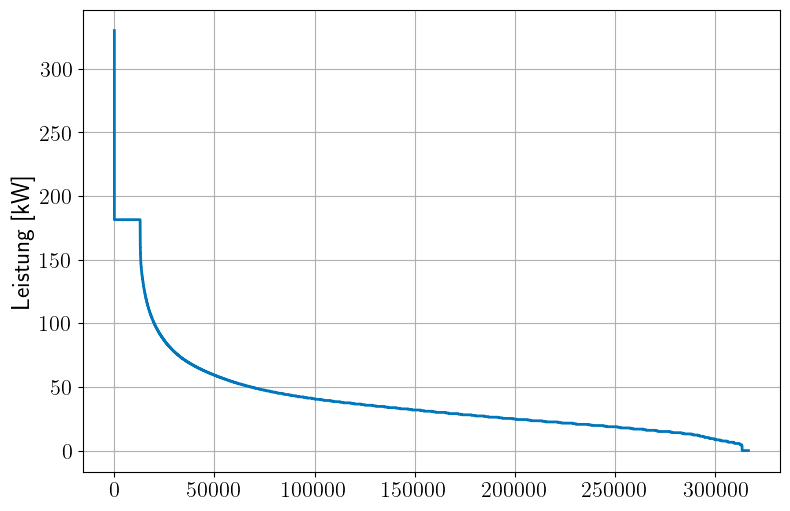

In [4]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import datetime as dt
from distutils.spawn import find_executable
from cycler import cycler

plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)

# define different color schemes according to:
# https://personal.sron.nl/~pault/#sec:qualitative

BRIGHT = ['#4477aa', '#66ccee', '#228833', '#ccbb44',
          '#ee6677', '#aa3377', '#bbbbbb']

HIGH_CONTRAST = ['#ffffff', '#ddaa33', '#bb5566', '#004488',
                 '#000000']

VIBRANT = ['#0077bb', '#33bbee', '#009988', '#ee7733',
          '#cc3311', '#ee3377', '#bbbbbb']

MUTED = ['#332288', '#88ccee', '#44aa99', '#117733',
         '#999933', '#ddcc77', '#cc6677', '#882255', '#aa4499',
         '#dddddd']

MEDIUM_CONTRAST = ['#ffffff', '#eecc66', '#ee99aa', '#6699cc',
                   '#997700', '#994455', '#004488', '#000000']

LIGHT = ['#77aadd', '#99ddff', '#44bb99', '#bbcc33',
         '#aaaa00', '#eedd88', '#ee8866', '#ffaabb', '#dddddd']

ALL_SCHEMES_KEYS = ['BRIGHT',
               'HIGH_CONTRAST',
               'VIBRANT',
               'MUTED',
               'MEDIUM_CONTRAST',
               'LIGHT']

ALL_SCHEMES_VALS = [BRIGHT,
                    HIGH_CONTRAST,
                    VIBRANT,
                    MUTED,
                    MEDIUM_CONTRAST,
                    LIGHT]

ALL_SCHEMES_DICT = dict(zip(ALL_SCHEMES_KEYS, ALL_SCHEMES_VALS))

def set_colors(scheme):
    if scheme not in ALL_SCHEMES_KEYS:
        raise ValueError(f"scheme not spported yet, needs to be either of\n\
        {[name for name in ALL_SCHEMES_KEYS]}")
    rcParams['axes.prop_cycle'] = cycler('color', ALL_SCHEMES_DICT[scheme])

set_colors('VIBRANT')

df = pd.read_csv('../data/household_data_1min_singleindex.csv')
df['zeit'] = df.utc_timestamp.apply(#
    lambda x: #
    dt.datetime.strptime(x, "%Y-%m-%dT%H:%M:%SZ"))
df.rename(columns = {'DE_KN_industrial1_grid_import':'industrial'}, inplace = True)
df['industrialP'] = df['industrial'].diff()
dW = 1000*60*60 # kWh in J
dt = 60 # min. in sec
dW_dt_faktor = dW/dt
df['industrialP'] = dW_dt_faktor*0.001*df['industrial'].diff()
df2 = df.dropna(subset=['zeit','industrialP'])
sorted_industrial = sorted(df2['industrialP'], reverse = True)
plt.figure(figsize=(9,6))
plt.plot(df2.index-df2.index[0],sorted_industrial)
plt.ylabel('Leistung [kW]')
plt.grid()
plt.show()

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>Beispielfrage für mündliche Prüfung</b></div>
Was sehen wir hier? Was hat das mit Energieeffizienz zu tun? Wo kann man anhand dieser Kurve Einsparpotenziale vermuten?
</div>

*Antwort: eigene Notizen*

## Aufgaben in diesem Kapitel

- [ ] [Daten plausibilisieren](check-data) (jupyter notebook unter `files/04/SYE-plausible-data`)
- [ ] [Daten bereinigen und abschätzen](clean-data) (jupyter notebook unter `files/04/SYE-data`)

Dieses Kapitel beinhaltet Techniken zur Plausibilisierung sowohl von Zeitreihen als auch von Einzeldaten. Dies ist wichtig, denn "wer misst, misst (auch) Mist" und daher sind sowohl eigene Messungen als auch fremde Daten immer möglicherweise fehlerbehaftet und manchmal auch aus Marketing-Gründen oder anderen Interessen heraus "geschönt". Es ist daher notwendig "fake data" von "real data" gut zu unterscheiden.